# __YÜKSEK DAYANIMLI BETON__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option("display.float_format", "{:.3f}".format)
sns.set()

In [2]:
cc = pd.read_csv('concrete_clean.csv')

In [5]:
cc.head(3)

,Cement,Slag,FlyAsh,Water,SPs,CoarseAgg,FineAgg,WC,Day,Strength
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,0.300,28,79.986
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,0.300,28,61.887
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,0.686,90,40.270


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE

In [6]:
Y = cc['Strength']
X = cc.drop(['Strength'], axis=1)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

standardscaler = StandardScaler()
x_train = standardscaler.fit_transform(x_train)
x_test = standardscaler.transform(x_test)

In [30]:
k_range = np.arange(10, 100, 5)
test_score, test_rsme = np.empty(len(k_range)), np.empty(len(k_range))

for i, k in enumerate(k_range):
    randomForest = RandomForestRegressor(n_estimators = k, random_state = 42)
    randomForest.fit(x_train, y_train) 
    y_pred = randomForest.predict(x_test)
    test_score[i] = randomForest.score(x_test, y_test)
    test_rsme[i] = MSE(y_test, y_pred)**(1/2)

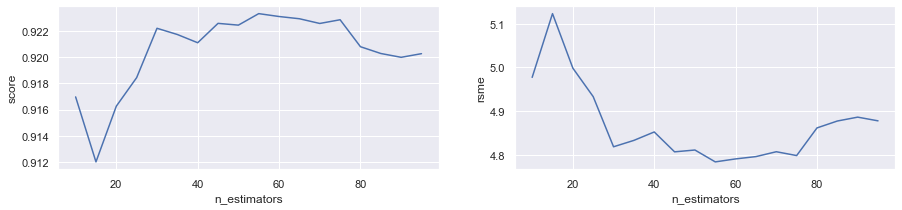

In [34]:
plt.figure(figsize=(15,3))
#score
plt.subplot(1, 2, 1)
plt.plot(k_range, test_score)
plt.xlabel('n_estimators')
plt.ylabel('score')
#rsme
plt.subplot(1, 2, 2)
plt.plot(k_range, test_rsme)
plt.xlabel('n_estimators')
plt.ylabel('rsme')
plt.show()

### Parametreler

In [37]:
randomForest = RandomForestRegressor()
params = {'criterion': ['mse', 'mae'], 'n_estimators': np.arange(40, 80, 5)}

In [38]:
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 42)
gridcv_results = GridSearchCV(estimator = randomForest, param_grid = params, cv = k_fold).fit(X, Y)

In [39]:
gridcv_results.best_params_

{'criterion': 'mae', 'n_estimators': 75}

In [40]:
pd.set_option("display.float_format", "{:.5f}".format)
grid_cv = pd.DataFrame(gridcv_results.cv_results_)
grid_cv = grid_cv[['mean_fit_time', 'param_criterion', 'param_n_estimators', 'mean_test_score']]
grid_cv = grid_cv.sort_values(by='mean_test_score', ascending = False)
grid_cv.head(5)

,mean_fit_time,param_criterion,param_n_estimators,mean_test_score
15,3.33543,mae,75,0.91371
12,2.73438,mae,60,0.91364
1,0.25224,mse,45,0.91357
13,2.68542,mae,65,0.91268
10,2.35581,mae,50,0.91236


# __BANKA KAMPANYASI__

In [41]:
bk = pd.read_csv('bank_clean.csv')

In [42]:
bk.head(3)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,4,1,0,0,1.10000,94.00000,-36.00000,5.00000,5191.00000,0,...,0,0,1,0,0,0,0,1,0,0
1,4,1,0,0,1.10000,94.00000,-36.00000,5.00000,5191.00000,0,...,0,0,1,0,0,0,0,1,0,0
2,2,1,0,0,1.10000,94.00000,-36.00000,5.00000,5191.00000,0,...,0,0,1,0,0,0,0,1,0,0


In [43]:
Y = bk['y_yes']
X = bk.drop(['y_yes'], axis=1)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

standardscaler = StandardScaler()
x_train = standardscaler.fit_transform(x_train)
x_test = standardscaler.transform(x_test)

In [49]:
k_range = np.arange(10, 100, 5)
test_score, test_rsme = np.empty(len(k_range)), np.empty(len(k_range))

for i, k in enumerate(k_range):
    randomForest = RandomForestClassifier(n_estimators = k, random_state = 42)
    randomForest.fit(x_train, y_train) 
    y_pred = randomForest.predict(x_test)
    test_score[i] = randomForest.score(x_test, y_test)
    test_rsme[i] = MSE(y_test, y_pred)**(1/2)

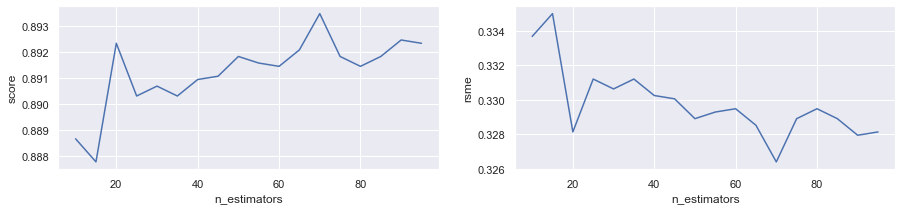

In [50]:
plt.figure(figsize=(15,3))
#score
plt.subplot(1, 2, 1)
plt.plot(k_range, test_score)
plt.xlabel('n_estimators')
plt.ylabel('score')
#rsme
plt.subplot(1, 2, 2)
plt.plot(k_range, test_rsme)
plt.xlabel('n_estimators')
plt.ylabel('rsme')
plt.show()

### Parametreler

In [51]:
randomForest = RandomForestClassifier()
params = {'n_estimators': np.arange(50, 300, 50), 'max_features': ['auto', 'sqrt', 'log2']}

In [53]:
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 42)
gridcv_results = GridSearchCV(estimator = randomForest, param_grid = params, cv = k_fold).fit(X, Y)

In [54]:
gridcv_results.best_params_

{'max_features': 'log2', 'n_estimators': 250}

In [58]:
pd.set_option("display.float_format", "{:.5f}".format)
grid_cv = pd.DataFrame(gridcv_results.cv_results_)
grid_cv = grid_cv[['mean_fit_time', 'param_max_features', 'param_n_estimators', 'mean_test_score']]
grid_cv = grid_cv.sort_values(by='mean_test_score', ascending = False)
grid_cv.head(5)

,mean_fit_time,param_max_features,param_n_estimators,mean_test_score
14,8.31118,log2,250,0.88644
4,10.14442,auto,250,0.88639
3,7.77255,auto,200,0.88623
9,11.47696,sqrt,250,0.88616
13,7.15024,log2,200,0.88596


### Karşılaştırmlar

In [59]:
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [60]:
def modelFrame(X, Y, idx):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
    
    standardscaler = StandardScaler()
    x_train = standardscaler.fit_transform(x_train)
    x_test = standardscaler.transform(x_test)
    
    k_fold = KFold(n_splits = 5, shuffle = True, random_state = 42)
    model = randomForest = RandomForestClassifier(max_features = 'log2', n_estimators = 250).fit(x_train, y_train)

    y_pred = model.predict(x_test)
    y_prob = model.predict_proba(x_test)[:,1]

    df = pd.Series({'accuracy': accuracy_score(y_test,y_pred),
                    'precision' :precision_score(y_test,y_pred),
                    'recall': recall_score(y_test,y_pred),
                    'f1-score': f1_score(y_test,y_pred),
                    'auc-roc': roc_auc_score(y_test, y_prob),
                    'cross-val': cross_val_score(estimator = RandomForestClassifier(max_features = 'log2', n_estimators = 250),
                                             X = X, y = Y, cv = k_fold).mean()}, name = idx)
    return df

In [61]:
dfModel = pd.DataFrame(columns = ['cross-val', 'accuracy', 'precision', 'recall', 'f1-score', 'auc-roc'])

Y = bk['y_yes']
X = bk.drop(['y_yes'], axis=1)
dfModel = dfModel.append(modelFrame(X, Y, 'rfc'))

x_smote, y_smote = SMOTE(random_state = 42).fit_sample(X, Y)
dfModel = dfModel.append(modelFrame(x_smote, y_smote, 'smote'))

dfModel

,cross-val,accuracy,precision,recall,f1-score,auc-roc
rfc,0.88692,0.89384,0.51789,0.28671,0.36909,0.76625
smote,0.90111,0.89518,0.88143,0.91301,0.89694,0.96009
